In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


In [147]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import seaborn as sb
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [692]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output


In [733]:
df = pd.read_csv('/data/sales_data_2015.csv',index_col='Unnamed: 0')

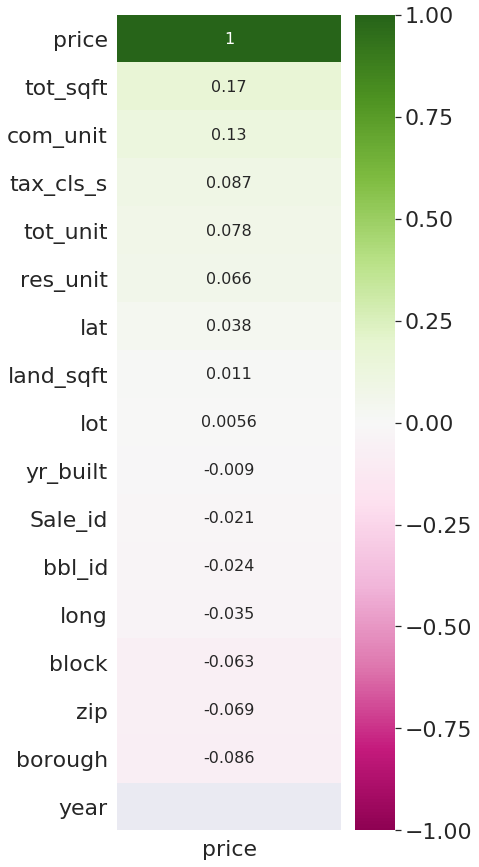

In [734]:
corr_new_train=df.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr_new_train[['price']].sort_values(by=['price'],ascending=False),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [735]:
# I delete Sale_id cause it's just index + 1
del df['Sale_id']
# I delete bbl_id cause its probably id of the sale from the provider, don't need it
del df['bbl_id']
# delete year cause only 2015
del df['year']
#delete easmnt cause only 1 one - rest is Nan
del df['easmnt']
#delte apt cause malo
del df['apt']
#delete usable cause all Yes
del df['usable']
del df['sale_date']
del df['address']
del df['tax_cls_p']
del df['bldg_cls_p']
del df['block']
del df['lot']
#del df['zip']
del df['bldg_ctgy']
#del df['bldg_cls_s']
del df['long']
del df['lat']
del df['borough']
del df['yr_built']

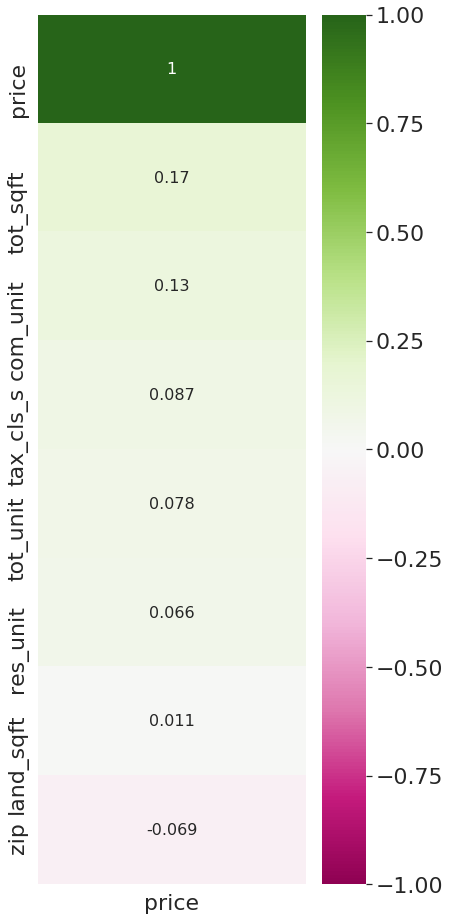

In [736]:
corr_new_train=df.corr()
plt.figure(figsize=(6,16))
sb.heatmap(corr_new_train[['price']].sort_values(by=['price'],ascending=False)[:10],annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [737]:
df

,zip,res_unit,com_unit,tot_unit,land_sqft,tot_sqft,tax_cls_s,bldg_cls_s,price
0,10457,1,0,1,4750,2619,1,A9,0
1,10457,1,0,1,4750,2619,1,A9,0
2,10457,1,1,2,1287,2528,1,S1,0
3,10458,1,1,2,2500,2452,1,S1,0
4,10458,1,1,2,2500,2452,1,S1,400000
...,...,...,...,...,...,...,...,...,...
84763,10309,2,0,2,3180,1300,1,B9,495000
84764,10309,2,0,2,3325,1300,1,B2,0
84765,10309,2,0,2,7933,2875,1,B2,825000
84766,10309,2,0,2,2210,1971,1,B9,10


In [738]:
df = df[df['price'] > 10000]
df = df[df['tot_sqft'] > 0]
df = df[df['tot_unit'] > 0]
len(df)

27809

In [739]:
84768-27809

56959

In [740]:
#for i in ['price','res_unit','com_unit','tot_unit','land_sqft','tot_sqft','yr_built']:
for i in ['price']:
    std = df[i].std(axis = 0, skipna = True) 
    mean = df[i].mean(axis = 0, skipna = True) 
    lower = mean - std
    upper = mean + std
    df = df[df[i] > lower]
    df = df[df[i] < upper]
len(df)

27213

In [741]:
27809-27213

596

In [742]:
df

,zip,res_unit,com_unit,tot_unit,land_sqft,tot_sqft,tax_cls_s,bldg_cls_s,price
4,10458,1,1,2,2500,2452,1,S1,400000
7,10457,2,0,2,2000,2400,1,B1,430000
9,10457,2,0,2,3165,2394,1,B1,505000
10,10457,2,1,3,1620,3240,1,S2,490000
12,10457,2,0,2,1592,1860,1,B3,100000
...,...,...,...,...,...,...,...,...,...
84758,10309,2,0,2,3447,1200,1,B9,465000
84759,10309,2,0,2,5645,1550,1,B9,515000
84761,10309,2,0,2,5700,1600,1,B2,165000
84763,10309,2,0,2,3180,1300,1,B9,495000


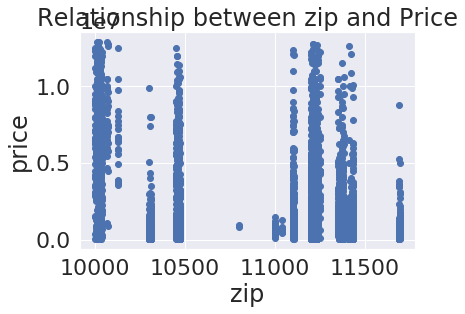

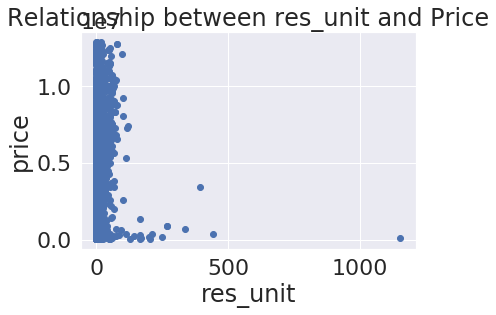

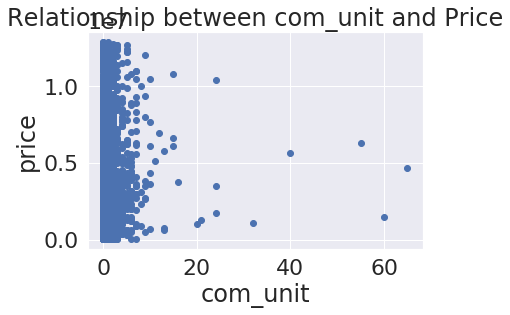

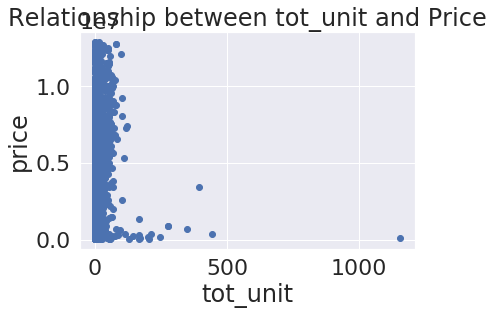

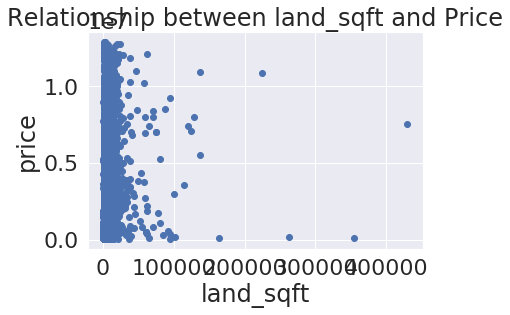

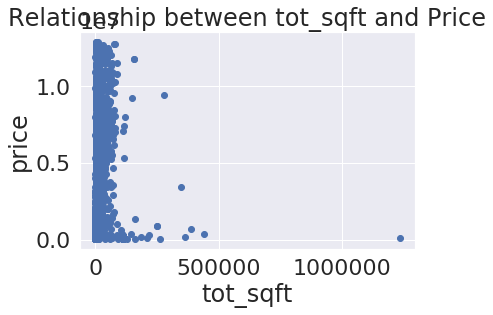

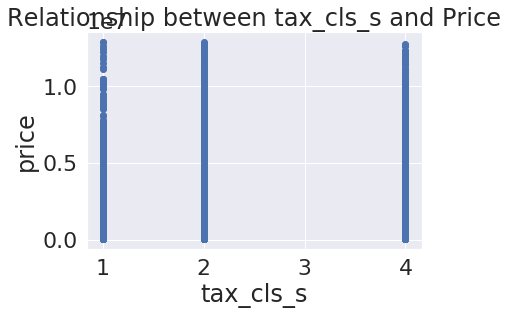

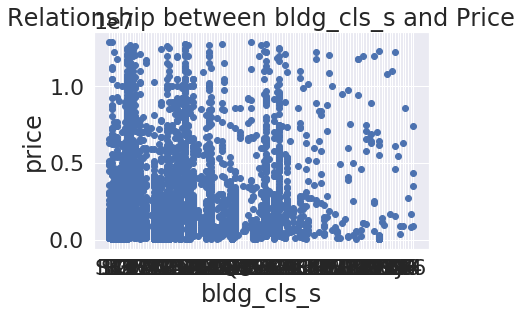

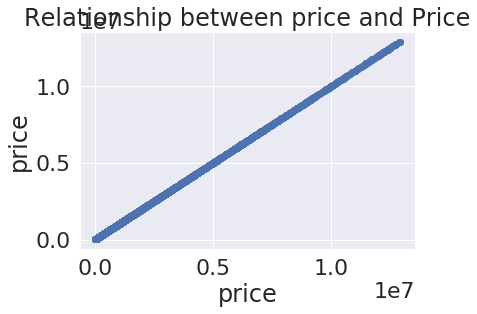

In [729]:
#fig, axes = plt.subplots(len(df.columns), 1,figsize=(20,80))
for i in df.columns:
    plt.scatter(x=df[i], y=df.price)
    plt.xlabel(i)
    plt.ylabel("price")
    plt.title("Relationship between " + i + " and Price")
    plt.show()

In [121]:
#df['tot_unit'].sort_values(ascending=True).head(50)

10083    0
12929    0
12935    0
16473    0
67468    0
44920    0
23429    0
73087    0
13238    0
12051    0
82165    0
13240    0
12928    0
23592    0
77178    0
16099    0
31633    0
82711    0
21527    0
21526    0
28419    0
28836    0
28814    0
28815    0
28817    0
75976    0
28818    0
34110    0
29256    0
64934    0
9168     0
13209    0
7468     0
20894    0
3949     0
64854    0
73570    0
7471     0
73580    0
20767    0
73582    0
73581    0
14535    0
3941     0
9173     0
19669    0
6127     0
18310    0
9174     0
19658    0
Name: tot_unit, dtype: int64

In [89]:
df['res_unit'].value_counts()

1      28000
0      25979
2      14659
3       4330
4       1357
       ...  
113        1
95         1
185        1
202        1
310        1
Name: res_unit, Length: 180, dtype: int64

In [122]:
df[df['tot_unit'] < 1]

,res_unit,com_unit,tot_unit,land_sqft,tot_sqft,yr_built,tax_cls_s,price
3941,0,0,0,220762,464700,1949,4,31631967
3943,0,0,0,42855,120650,1965,4,97597695
3949,0,0,0,222539,35600,1949,4,17598405
6127,0,0,0,2625,680,1930,1,75000
7468,0,0,0,1965,4620,1931,4,2700000
7471,0,0,0,11000,3000,1957,4,3000000
9168,0,0,0,3300,9900,1931,4,4700000
9173,0,0,0,3200,9120,1931,4,2323750
9174,0,0,0,3200,9120,1931,4,1525000
9958,0,0,0,30000,2200,1959,4,2500000


In [743]:
df = df[df['res_unit'] < 500]
##df = df[df['res_unit'] > 0]
#df = df[df['yr_built'] > 1900]
df = df[df['com_unit'] < 20]
#df = df[df['com_unit'] > 0]
df = df[df['tot_unit'] < 100]
df = df[df['land_sqft'] < 100000]
#df = df[df['land_sqft'] > 0]
df = df[df['tot_sqft'] < 100000]

df

,zip,res_unit,com_unit,tot_unit,land_sqft,tot_sqft,tax_cls_s,bldg_cls_s,price
4,10458,1,1,2,2500,2452,1,S1,400000
7,10457,2,0,2,2000,2400,1,B1,430000
9,10457,2,0,2,3165,2394,1,B1,505000
10,10457,2,1,3,1620,3240,1,S2,490000
12,10457,2,0,2,1592,1860,1,B3,100000
...,...,...,...,...,...,...,...,...,...
84758,10309,2,0,2,3447,1200,1,B9,465000
84759,10309,2,0,2,5645,1550,1,B9,515000
84761,10309,2,0,2,5700,1600,1,B2,165000
84763,10309,2,0,2,3180,1300,1,B9,495000


In [716]:
27213 - 26558

655

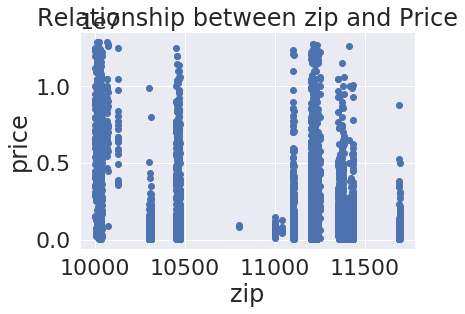

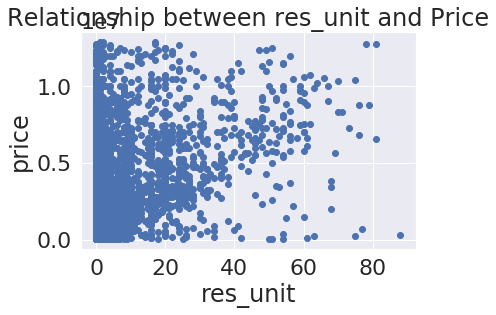

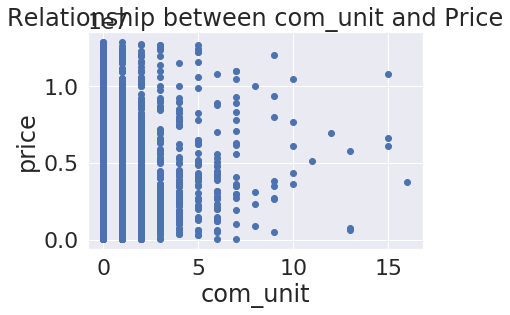

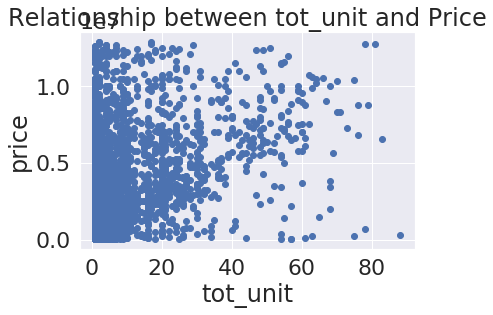

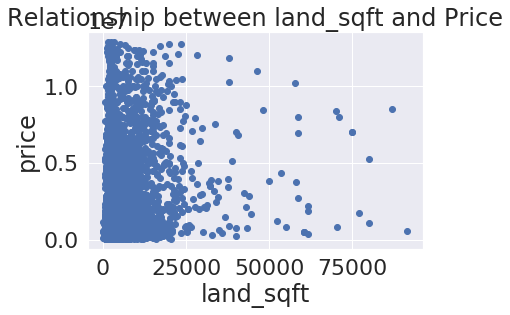

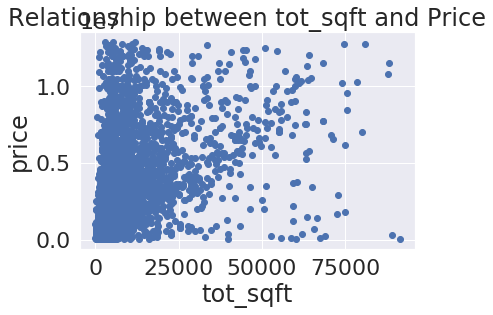

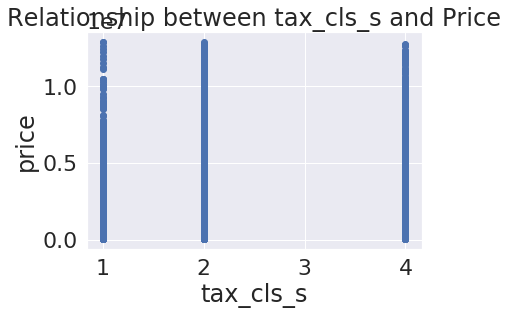

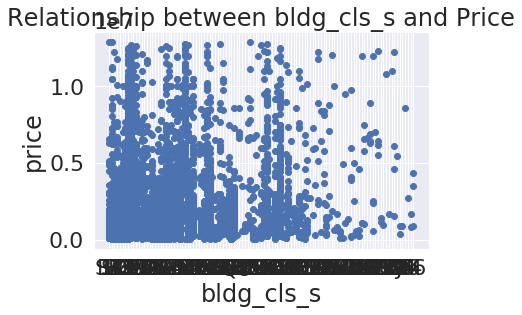

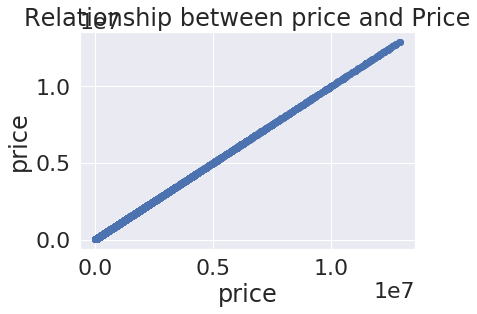

In [744]:
#fig, axes = plt.subplots(len(df.columns), 1,figsize=(20,80))
for i in df.columns:
    plt.scatter(x=df[i], y=df.price)
    plt.xlabel(i)
    plt.ylabel("price")
    plt.title("Relationship between " + i + " and Price")
    plt.show()

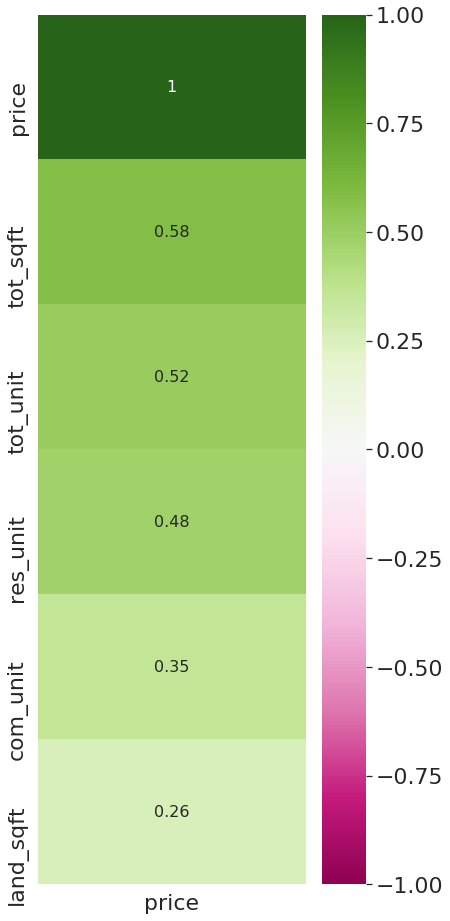

In [748]:
corr_new_train=df.corr()
plt.figure(figsize=(6,16))
sb.heatmap(corr_new_train[['price']].sort_values(by=['price'],ascending=False)[:10],annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [749]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na.sort_values(ascending=False)


price        0.000
bldg_cls_s   0.000
tax_cls_s    0.000
tot_sqft     0.000
land_sqft    0.000
tot_unit     0.000
com_unit     0.000
res_unit     0.000
zip          0.000
dtype: float64

In [750]:
#df['borough'] = df['borough'].apply(str)
#df['zip'] = df['zip'].apply(str)
df['tax_cls_s'] = df['tax_cls_s'].apply(str)
df['zip'] = df['zip'].apply(str)
df.dtypes

zip           object
res_unit       int64
com_unit       int64
tot_unit       int64
land_sqft      int64
tot_sqft       int64
tax_cls_s     object
bldg_cls_s    object
price          int64
dtype: object


 mu = 1006056.25 and sigma = 1487301.69



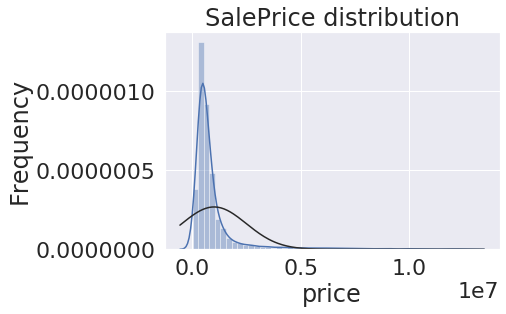

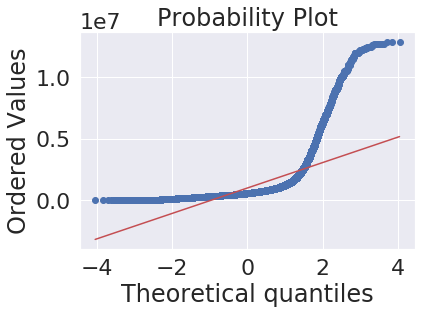

In [613]:
sb.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()


 mu = 13.36 and sigma = 0.87



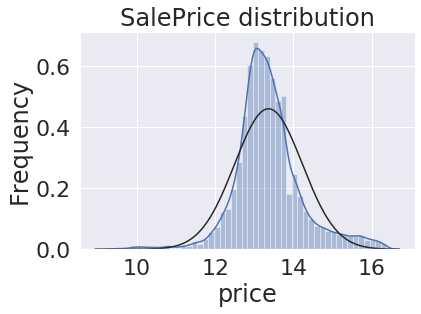

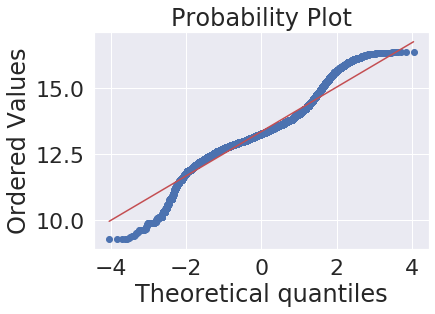

In [614]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["price"] = np.log1p(df["price"])

#Check the new distribution 
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

In [557]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(50)


Skew in numerical features: 



,Skew
land_sqft,9.714
com_unit,7.950
res_unit,7.940
tot_sqft,7.889
tot_unit,7.764
price,4.342


In [483]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

There are 6 skewed numerical features to Box Cox transform


In [751]:
df = pd.get_dummies(df)

In [752]:
len(X)

26558

In [753]:
X = df.drop('price', axis = 1)
X_train,X_test,y_train,y_test=train_test_split(X,df.price,test_size=0.002,random_state=52)

In [754]:
from sklearn.linear_model import LinearRegression


#This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

In [755]:
lm.fit(X_train, y_train)
#print the intercept and number of coefficients.
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: -102969301395141.5
Number of coefficients: 294


In [756]:
mseFull = np.mean((y_test - lm.predict(X_test))** 2)

print(mseFull)

863897989419.3655


In [538]:
lm.predict(X_test)[:5]

array([2.65788012, 2.64148582, 2.67057597, 2.65483286, 2.65370941])

In [757]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
----------LGBM----------
R square Accuracy:  0.8416034206536888
Mean Absolute Error Accuracy:  322291.1549677514
Mean Squared Error Accuracy:  510849844765.382


In [758]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------GBR----------
R square Accuracy:  0.8273474238648679
Mean Absolute Error Accuracy:  302545.42452689353
Mean Squared Error Accuracy:  556827313323.0988


In [759]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_head=ridgecv_reg.predict(X_test)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13309e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.17391e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.1682e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.1336e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.16246e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgW

----------RidgeCV----------
R square Accuracy:  0.7321357622840562
Mean Absolute Error Accuracy:  350840.8478374276
Mean Squared Error Accuracy:  863897470640.5109


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.04035e-18): result may not be accurate.
  overwrite_a=True).T


In [760]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

lassocv_reg= make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(X_train, y_train)
y_head=lassocv_reg.predict(X_test)
print('-'*10+'LassoCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------LassoCV----------
R square Accuracy:  0.732153008415668
Mean Absolute Error Accuracy:  350849.6897428259
Mean Squared Error Accuracy:  863841849593.0552


In [766]:
294/322

0.9130434782608695

In [762]:
X_train = X_train.join(df_img, how='left')
X_test = X_test.join(df_img, how='left')

In [763]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [764]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
----------LGBM----------
R square Accuracy:  0.8917423598828013
Mean Absolute Error Accuracy:  294187.0210732504
Mean Squared Error Accuracy:  349145157532.8824


In [612]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------GBR----------
R square Accuracy:  0.884541104393707
Mean Absolute Error Accuracy:  259793.76739952693
Mean Squared Error Accuracy:  372370155597.24457


In [765]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_head=ridgecv_reg.predict(X_test)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.28769e-30): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29029e-30): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29965e-30): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29611e-30): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29237e-30): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

----------RidgeCV----------
R square Accuracy:  0.7345270610939083
Mean Absolute Error Accuracy:  341998.9685008739
Mean Squared Error Accuracy:  856185216810.0178


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29349e-27): result may not be accurate.
  overwrite_a=True).T


In [663]:
259793/302545

0.8586920953907683

In [767]:
340/350

0.9714285714285714

In [523]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_head=ridgecv_reg.predict(X_test)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03958e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00289e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.01342e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.85204e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.06478e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

----------RidgeCV----------
R square Accuracy:  0.6525297764157445
Mean Absolute Error Accuracy:  478633.48032753036
Mean Squared Error Accuracy:  1120637266986.178


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.12623e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03185e-21): result may not be accurate.
  overwrite_a=True).T


In [524]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

lassocv_reg= make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(X_train, y_train)
y_head=lassocv_reg.predict(X_test)
print('-'*10+'LassoCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------LassoCV----------
R square Accuracy:  0.6526379908675761
Mean Absolute Error Accuracy:  478625.3788647689
Mean Squared Error Accuracy:  1120288261116.558


In [525]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

elasticv_reg= make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
elasticv_reg.fit(X_train, y_train)
y_head=elasticv_reg.predict(X_test)
print('-'*10+'ElasticNetCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------ElasticNetCV----------
R square Accuracy:  0.6541075660741603
Mean Absolute Error Accuracy:  478124.75875369646
Mean Squared Error Accuracy:  1115548687388.0544


In [359]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [519]:
'''
ntrain = 10

train = df[:ntrain].drop('price',axis=1)
y_train = df['price'][:ntrain]
test = df[ntrain:]


'''
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))

    return(rmse)

In [520]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [521]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[20:56:14] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:56:44] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:15] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:45] WARNING: ..

In [540]:
df

,res_unit,com_unit,tot_unit,land_sqft,tot_sqft,price,bldg_ctgy_01 ONE FAMILY DWELLINGS,bldg_ctgy_02 TWO FAMILY DWELLINGS,bldg_ctgy_03 THREE FAMILY DWELLINGS,bldg_ctgy_05 TAX CLASS 1 VACANT LAND,bldg_ctgy_06 TAX CLASS 1 - OTHER,bldg_ctgy_07 RENTALS - WALKUP APARTMENTS,bldg_ctgy_08 RENTALS - ELEVATOR APARTMENTS,bldg_ctgy_09 COOPS - WALKUP APARTMENTS,bldg_ctgy_10 COOPS - ELEVATOR APARTMENTS,bldg_ctgy_11A CONDO-RENTALS,bldg_ctgy_13 CONDOS - ELEVATOR APARTMENTS,bldg_ctgy_14 RENTALS - 4-10 UNIT,bldg_ctgy_17 CONDO COOPS,bldg_ctgy_21 OFFICE BUILDINGS,bldg_ctgy_22 STORE BUILDINGS,bldg_ctgy_23 LOFT BUILDINGS,bldg_ctgy_26 OTHER HOTELS,bldg_ctgy_27 FACTORIES,bldg_ctgy_29 COMMERCIAL GARAGES,bldg_ctgy_30 WAREHOUSES,bldg_ctgy_31 COMMERCIAL VACANT LAND,bldg_ctgy_32 HOSPITAL AND HEALTH FACILITIES,bldg_ctgy_33 EDUCATIONAL FACILITIES,bldg_ctgy_34 THEATRES,bldg_ctgy_35 INDOOR PUBLIC AND CULTURAL FACILITIES,bldg_ctgy_36 OUTDOOR RECREATIONAL FACILITIES,bldg_ctgy_37 RELIGIOUS FACILITIES,bldg_ctgy_38 ASYLUMS AND HOMES,bldg_ctgy_41 TAX CLASS 4 - OTHER,tax_cls_s_1,tax_cls_s_2,tax_cls_s_4
4,1,1,2,2500,2452,2.632,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,2,0,2,2000,2400,2.637,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,2,0,2,3165,2394,2.648,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,2,1,3,1620,3240,2.646,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12,2,0,2,1592,1860,2.527,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84758,2,0,2,3447,1200,2.643,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
84759,2,0,2,5645,1550,2.650,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
84761,2,0,2,5700,1600,2.566,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
84763,2,0,2,3180,1300,2.647,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
